0.5000000000774034
0.49844639778713473
0.5000000000774033
0.5000000000662955


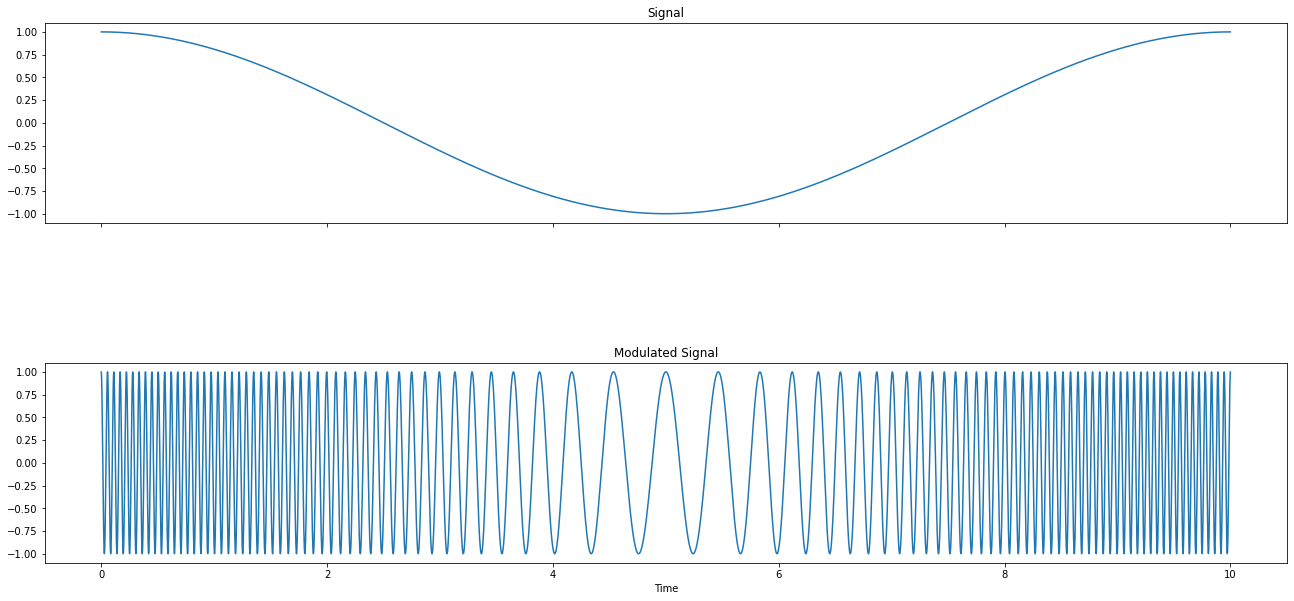

In [15]:

import numpy as np
import matplotlib.pyplot as plt

#%% signal generation
fn = 500 # Nyquist Frequency
fs = 2*fn # sampling frequency
t = np.arange(0, 10, 1/fs) # time axis

f_sig = 0.1 # base signal frequency
sig = np.cos(2*np.pi*f_sig*t) # base signal

#%% modulation
fc = 10 # carrier frequency
k = 0.05 # sensitivity
phi = 2*np.pi*fc*t + k*np.cumsum(sig) # phase

sig_mod = np.cos(phi) # modulated signal

#%% plotting
fig, ax = plt.subplots(2, 1, num=0, clear=True, sharex=True)
plt.subplots_adjust(hspace=0.7, right=3, top=2)
ax[0].set_title('Signal')
ax[0].plot(t, sig)

ax[1].set_title('Modulated Signal')
ax[1].plot(t, sig_mod)
ax[1].set_xlabel('Time')

#Calculando a potência com o sinal no tempo
Px_tempo =(np.linalg.norm(sig_mod)**2)/(len(sig_mod))  
#Calculando a potência com o sinal na frequencia
Nfft = 1000                          # Número de pontos da FFT
Xfft=np.fft.fft(sig_mod,Nfft)              # Encontra a FFT
Xfft = Xfft/Nfft                     # Encontra a FFT 
Px_fft = np.sum(Xfft*np.conj(Xfft))
Px_fft = abs(Px_fft)
#Calculando a potência via correlação
Rxx=np.correlate(sig_mod,sig_mod,'full')/len(sig_mod)  # Estima a autocorrelaçao de x(n)
Px_Rxx = Rxx[len(sig_mod)-1]    
#Calculando a potência via variância
Pvar = np.var(sig_mod)

print(f"Potencia calculado com o sinal no tempo: {Px_tempo}")
print(f"Potencia calculada com o sinal na frequencia(FFT): {Px_fft}")
print(f"Potencia calculada usando a autocorrelação: {Px_Rxx}")
print(f"Potencia calculada usando a variância: {Pvar}")





